<b>Step 1</b> - Importing libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

<b>Step 2</b> - importing data

In [2]:
Data = pd.read_csv("WIDS Dataset_2020_Adj.csv")

In [3]:
Data[:5] #checking if the dataset was imported successfully

,X,Date,Zone1Position,Zone2Position,Zone3Position,SKU,Zone1_Row_Num,Zone1_Col_Num,Zone2_Row_Num,Zone2_Col_num,...,Zone2_Humidity_Max,Zone2_Humidity_Range,Zone3_Humidity_Avg,Zone3_Humidity_Min,Zone3_Humidity_Max,Zone3_Humidity_Range,Block_Num,Block_Position,Block_Orientation,Result_Type
0,1,09/01/2020,3.0,2.0,3.0,A001,1.0,3.0,1.0,2.0,...,61.80,10.0,39.19,33.19,45.19,12.0,1000.0,1.0,1,Defect_1
1,2,03/12/2019,8.0,4.0,3.0,A001,2.0,4.0,2.0,2.0,...,58.12,16.0,48.50,40.50,56.50,16.0,1003.0,1.0,1,Defect_1
2,3,21/11/2019,4.0,2.0,3.0,B003,1.0,4.0,1.0,2.0,...,50.97,10.0,52.20,46.20,58.20,12.0,1001.0,4.0,1,PASS
3,4,22/11/2019,6.0,3.0,1.0,B003,2.0,2.0,2.0,1.0,...,59.13,4.0,39.29,31.29,47.29,16.0,1003.0,2.0,1,PASS
4,5,23/12/2019,3.0,2.0,3.0,B003,1.0,3.0,1.0,2.0,...,65.80,18.0,45.37,42.37,48.37,6.0,1002.0,1.0,1,PASS


<b>Step 3</b> - Exploring the data columns' name and the type of data in each column

In [4]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75750 entries, 0 to 75749
Data columns (total 53 columns):
X                         75750 non-null int64
Date                      75707 non-null object
Zone1Position             75712 non-null float64
Zone2Position             75706 non-null float64
Zone3Position             75713 non-null float64
SKU                       75711 non-null object
Zone1_Row_Num             75715 non-null float64
Zone1_Col_Num             75708 non-null float64
Zone2_Row_Num             75704 non-null float64
Zone2_Col_num             75716 non-null float64
Zone3_Row_Num             75713 non-null float64
Zone3_Col_Num             75714 non-null float64
Zone1_Left_Block_Bin      75708 non-null float64
Zone1_Right_Block_Bin     75710 non-null float64
Zone1_Area                75709 non-null object
Zone3_Area                75718 non-null object
Zone1_Dur                 75713 non-null float64
Zone2_Dur                 75708 non-null float64
Zone3_Dur      

<b>Step 4</b> - Identifying the number and percentage of missing data per each column

In [5]:
print("Number of missing values per each column:")
print(Data.isnull().sum())

Number of missing values per each column:
X                          0
Date                      43
Zone1Position             38
Zone2Position             44
Zone3Position             37
SKU                       39
Zone1_Row_Num             35
Zone1_Col_Num             42
Zone2_Row_Num             46
Zone2_Col_num             34
Zone3_Row_Num             37
Zone3_Col_Num             36
Zone1_Left_Block_Bin      42
Zone1_Right_Block_Bin     40
Zone1_Area                41
Zone3_Area                32
Zone1_Dur                 37
Zone2_Dur                 42
Zone3_Dur                 47
Zone1_Out_Zone2_In_Dur    43
Zone1_Out_Zone3_In_Dur    42
Zone2_Out_Zone3_In_Dur    41
Zone1_In_Zone3_Out_Dur    34
Zone1_In_Zone2_Out_Dur    44
Zone2_In_Zone3_Out_Dur    39
Zone1_Temp_Avg            52
Zone1_Temp_Min            46
Zone1_Temp_Max            39
Zone1_Temp_Range          41
Zone2_Temp_Avg            51
Zone2_Temp_Min            53
Zone2_Temp_Max            37
Zone2_Temp_Range          37
Z

In [6]:
print("Percentage of missing data in each column:")
sum_miss_data = (Data.isnull().sum()) / len(Data)
print(sum_miss_data)

Percentage of missing data in each column:
X                         0.000000
Date                      0.000568
Zone1Position             0.000502
Zone2Position             0.000581
Zone3Position             0.000488
SKU                       0.000515
Zone1_Row_Num             0.000462
Zone1_Col_Num             0.000554
Zone2_Row_Num             0.000607
Zone2_Col_num             0.000449
Zone3_Row_Num             0.000488
Zone3_Col_Num             0.000475
Zone1_Left_Block_Bin      0.000554
Zone1_Right_Block_Bin     0.000528
Zone1_Area                0.000541
Zone3_Area                0.000422
Zone1_Dur                 0.000488
Zone2_Dur                 0.000554
Zone3_Dur                 0.000620
Zone1_Out_Zone2_In_Dur    0.000568
Zone1_Out_Zone3_In_Dur    0.000554
Zone2_Out_Zone3_In_Dur    0.000541
Zone1_In_Zone3_Out_Dur    0.000449
Zone1_In_Zone2_Out_Dur    0.000581
Zone2_In_Zone3_Out_Dur    0.000515
Zone1_Temp_Avg            0.000686
Zone1_Temp_Min            0.000607
Zone1_Temp_M

Filling in the columns with missing data based on the data from the other dependent columns, such as:
- The four routes of the items (E.g. the position in a zone can be deduced from the value in the row and column)
- Range, Min, Max (Range can be calculated by substracting the minimum value from the maximum value, Minimum can be inputed by sbstracting the range from the maximum

In [7]:
Data["Zone1Position"] = Data["Zone1Position"].fillna(value=(Data["Zone1_Row_Num"] -1) * 4 + Data["Zone1_Col_Num"])
Data["Zone1Position"].isnull().sum()

0

In [8]:
Data["Zone2Position"] = Data["Zone2Position"].fillna(value=(Data["Zone2_Row_Num"] -1) * 2 + Data["Zone2_Col_num"])
Data["Zone2Position"].isnull().sum()

0

In [9]:
Data["Zone3Position"] = Data["Zone3Position"].fillna(value=(Data["Zone3_Row_Num"] -1) * 3 + Data["Zone3_Col_Num"])
Data["Zone3Position"].isnull().sum()

0

In [10]:
Data["Zone1_Row_Num"] = Data["Zone1_Row_Num"].fillna(value=((Data["Zone1Position"]-Data["Zone1_Col_Num"])/4)+1)
Data["Zone1_Row_Num"].isnull().sum()

0

In [11]:
Data["Zone2_Row_Num"] = Data["Zone2_Row_Num"].fillna(value=((Data["Zone2Position"]-Data["Zone2_Col_num"])/2)+1)
Data["Zone2_Row_Num"].isnull().sum()

0

In [12]:
Data["Zone3_Row_Num"] = Data["Zone3_Row_Num"].fillna(value=((Data["Zone3Position"]-Data["Zone3_Col_Num"])/3)+1)
Data["Zone3_Row_Num"].isnull().sum()

0

In [13]:
Data["Zone1_Col_Num"] = Data["Zone1_Col_Num"].fillna(value=Data["Zone1Position"]-((Data["Zone1_Row_Num"]-1)*4))
Data["Zone1_Col_Num"].isnull().sum()

0

In [14]:
Data["Zone2_Col_num"] = Data["Zone2_Col_num"].fillna(value=Data["Zone2Position"]-((Data["Zone2_Row_Num"]-1)*2))
Data["Zone2_Col_num"].isnull().sum()

0

In [15]:
Data["Zone3_Col_Num"] = Data["Zone3_Col_Num"].fillna(value=Data["Zone3Position"]-((Data["Zone3_Row_Num"]-1)*3))
Data["Zone3_Col_Num"].isnull().sum()

0

In [16]:
Data["Zone1_Temp_Range"] = Data["Zone1_Temp_Range"].fillna(value=Data["Zone1_Temp_Max"]-Data["Zone1_Temp_Min"])
Data["Zone2_Temp_Range"] = Data["Zone2_Temp_Range"].fillna(value=Data["Zone2_Temp_Max"]-Data["Zone2_Temp_Min"])
Data["Zone3_Temp_Range"] = Data["Zone3_Temp_Range"].fillna(value=Data["Zone3_Temp_Max"]-Data["Zone3_Temp_Min"])

Data["Zone1_Temp_Max"] = Data["Zone1_Temp_Max"].fillna(value=Data["Zone1_Temp_Range"]+Data["Zone1_Temp_Min"])
Data["Zone2_Temp_Max"] = Data["Zone2_Temp_Max"].fillna(value=Data["Zone2_Temp_Range"]+Data["Zone2_Temp_Min"])
Data["Zone3_Temp_Max"] = Data["Zone3_Temp_Max"].fillna(value=Data["Zone3_Temp_Range"]+Data["Zone3_Temp_Min"])

Data["Zone1_Temp_Min"] = Data["Zone1_Temp_Min"].fillna(value=Data["Zone1_Temp_Max"]-Data["Zone1_Temp_Range"])
Data["Zone2_Temp_Min"] = Data["Zone2_Temp_Min"].fillna(value=Data["Zone2_Temp_Max"]-Data["Zone2_Temp_Range"])
Data["Zone3_Temp_Min"] = Data["Zone3_Temp_Min"].fillna(value=Data["Zone3_Temp_Max"]-Data["Zone3_Temp_Range"])

Data.isnull().sum()

X                          0
Date                      43
Zone1Position              0
Zone2Position              0
Zone3Position              0
SKU                       39
Zone1_Row_Num              0
Zone1_Col_Num              0
Zone2_Row_Num              0
Zone2_Col_num              0
Zone3_Row_Num              0
Zone3_Col_Num              0
Zone1_Left_Block_Bin      42
Zone1_Right_Block_Bin     40
Zone1_Area                41
Zone3_Area                32
Zone1_Dur                 37
Zone2_Dur                 42
Zone3_Dur                 47
Zone1_Out_Zone2_In_Dur    43
Zone1_Out_Zone3_In_Dur    42
Zone2_Out_Zone3_In_Dur    41
Zone1_In_Zone3_Out_Dur    34
Zone1_In_Zone2_Out_Dur    44
Zone2_In_Zone3_Out_Dur    39
Zone1_Temp_Avg            52
Zone1_Temp_Min             0
Zone1_Temp_Max             0
Zone1_Temp_Range           0
Zone2_Temp_Avg            51
Zone2_Temp_Min             0
Zone2_Temp_Max             0
Zone2_Temp_Range           0
Zone3_Temp_Avg            43
Zone3_Temp_Min

In [17]:
Data["Zone1_Humidity_Range"] = Data["Zone1_Humidity_Range"].fillna(value=Data["Zone1_Humidity_Max"]-Data["Zone1_Humidity_Min"])
Data["Zone2_Humidity_Range"] = Data["Zone2_Humidity_Range"].fillna(value=Data["Zone2_Humidity_Max"]-Data["Zone2_Humidity_Min"])
Data["Zone3_Humidity_Range"] = Data["Zone3_Humidity_Range"].fillna(value=Data["Zone3_Humidity_Max"]-Data["Zone3_Humidity_Min"])

Data["Zone1_Humidity_Max"] = Data["Zone1_Humidity_Max"].fillna(value=Data["Zone1_Humidity_Range"]+Data["Zone1_Humidity_Min"])
Data["Zone2_Humidity_Max"] = Data["Zone2_Humidity_Max"].fillna(value=Data["Zone2_Humidity_Range"]+Data["Zone2_Humidity_Min"])
Data["Zone3_Humidity_Max"] = Data["Zone3_Humidity_Max"].fillna(value=Data["Zone3_Humidity_Range"]+Data["Zone3_Humidity_Min"])

Data["Zone1_Humidity_Min"] = Data["Zone1_Humidity_Min"].fillna(value=Data["Zone1_Humidity_Max"]-Data["Zone1_Humidity_Range"])
Data["Zone2_Humidity_Min"] = Data["Zone2_Humidity_Min"].fillna(value=Data["Zone2_Humidity_Max"]-Data["Zone2_Humidity_Range"])
Data["Zone3_Humidity_Min"] = Data["Zone3_Humidity_Min"].fillna(value=Data["Zone3_Humidity_Max"]-Data["Zone3_Humidity_Range"])

Data.isnull().sum()

X                          0
Date                      43
Zone1Position              0
Zone2Position              0
Zone3Position              0
SKU                       39
Zone1_Row_Num              0
Zone1_Col_Num              0
Zone2_Row_Num              0
Zone2_Col_num              0
Zone3_Row_Num              0
Zone3_Col_Num              0
Zone1_Left_Block_Bin      42
Zone1_Right_Block_Bin     40
Zone1_Area                41
Zone3_Area                32
Zone1_Dur                 37
Zone2_Dur                 42
Zone3_Dur                 47
Zone1_Out_Zone2_In_Dur    43
Zone1_Out_Zone3_In_Dur    42
Zone2_Out_Zone3_In_Dur    41
Zone1_In_Zone3_Out_Dur    34
Zone1_In_Zone2_Out_Dur    44
Zone2_In_Zone3_Out_Dur    39
Zone1_Temp_Avg            52
Zone1_Temp_Min             0
Zone1_Temp_Max             0
Zone1_Temp_Range           0
Zone2_Temp_Avg            51
Zone2_Temp_Min             0
Zone2_Temp_Max             0
Zone2_Temp_Range           0
Zone3_Temp_Avg            43
Zone3_Temp_Min

<b>Step 5</b> - Data summary

In [20]:
Data.describe(include='all')

,X,Date,Zone1Position,Zone2Position,Zone3Position,SKU,Zone1_Row_Num,Zone1_Col_Num,Zone2_Row_Num,Zone2_Col_num,...,Zone2_Humidity_Max,Zone2_Humidity_Range,Zone3_Humidity_Avg,Zone3_Humidity_Min,Zone3_Humidity_Max,Zone3_Humidity_Range,Block_Num,Block_Position,Block_Orientation,Result_Type
count,75750.000000,75707,75750.000000,75750.000000,75750.000000,75711,75750.000000,75750.000000,75750.000000,75750.000000,...,75750.000000,75750.000000,75710.000000,75750.000000,75750.000000,75750.000000,75708.000000,75711.000000,75750.0,75750
unique,NaN,91,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,20/01/2020,NaN,NaN,NaN,C005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS
freq,NaN,904,NaN,NaN,NaN,31546,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54720
mean,37505.877043,NaN,4.499300,2.499182,3.494627,NaN,1.498997,2.503314,1.498997,1.501188,...,56.559336,10.846759,44.602891,40.068211,49.136779,9.068568,1003.509788,2.486746,1.0,NaN
std,21651.573231,NaN,2.291821,1.120695,1.705809,NaN,0.500002,1.113659,0.500002,0.500002,...,5.381163,6.409379,5.504732,5.758301,5.777221,3.445756,2.292423,1.116384,0.0,NaN
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,43.260000,2.000000,33.710000,25.710000,35.710000,4.000000,1000.000000,1.000000,1.0,NaN
25%,18760.250000,NaN,2.000000,1.000000,2.000000,NaN,1.000000,2.000000,1.000000,1.000000,...,53.010000,4.000000,41.570000,36.400000,45.400000,6.000000,1002.000000,1.000000,1.0,NaN
50%,37505.500000,NaN,4.000000,2.000000,3.000000,NaN,1.000000,3.000000,1.000000,2.000000,...,56.870000,10.000000,44.360000,39.910000,48.940000,8.000000,1004.000000,2.000000,1.0,NaN
75%,56259.750000,NaN,7.000000,4.000000,5.000000,NaN,2.000000,3.000000,2.000000,2.000000,...,60.300000,16.000000,48.320000,43.520000,52.710000,12.000000,1006.000000,3.000000,1.0,NaN


In [38]:
Data.to_csv("Data_processed.csv", encoding='utf-8', index=False)

<b>Step 6 - </b> Exploratory data analysis: univariate, bivariate and multivariate analysis and plots

In [41]:
corr = Data.corr()
print(corr)

                               X  Zone1Position  Zone2Position  Zone3Position  \
X                       1.000000      -0.002361      -0.000636      -0.000227   
Zone1Position          -0.002361       1.000000       0.975913       0.429340   
Zone2Position          -0.000636       0.975913       1.000000       0.440241   
Zone3Position          -0.000227       0.429340       0.440241       1.000000   
Zone1_Row_Num           0.000569       0.874000       0.894960       0.297702   
Zone1_Col_Num          -0.005882       0.488312       0.401101       0.348909   
Zone2_Row_Num           0.000569       0.874000       0.894960       0.297702   
Zone2_Col_num          -0.002564       0.439392       0.451459       0.391343   
Zone3_Row_Num           0.001069       0.292748       0.299686       0.877669   
Zone3_Col_Num          -0.002434       0.358700       0.368714       0.476197   
Zone1_Left_Block_Bin    0.002709      -0.439360      -0.451405      -0.391223   
Zone1_Right_Block_Bin  -0.00

C:\Users\Raluca\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [45]:
corr.style.background_gradient(cmap='jet').set_precision(2)

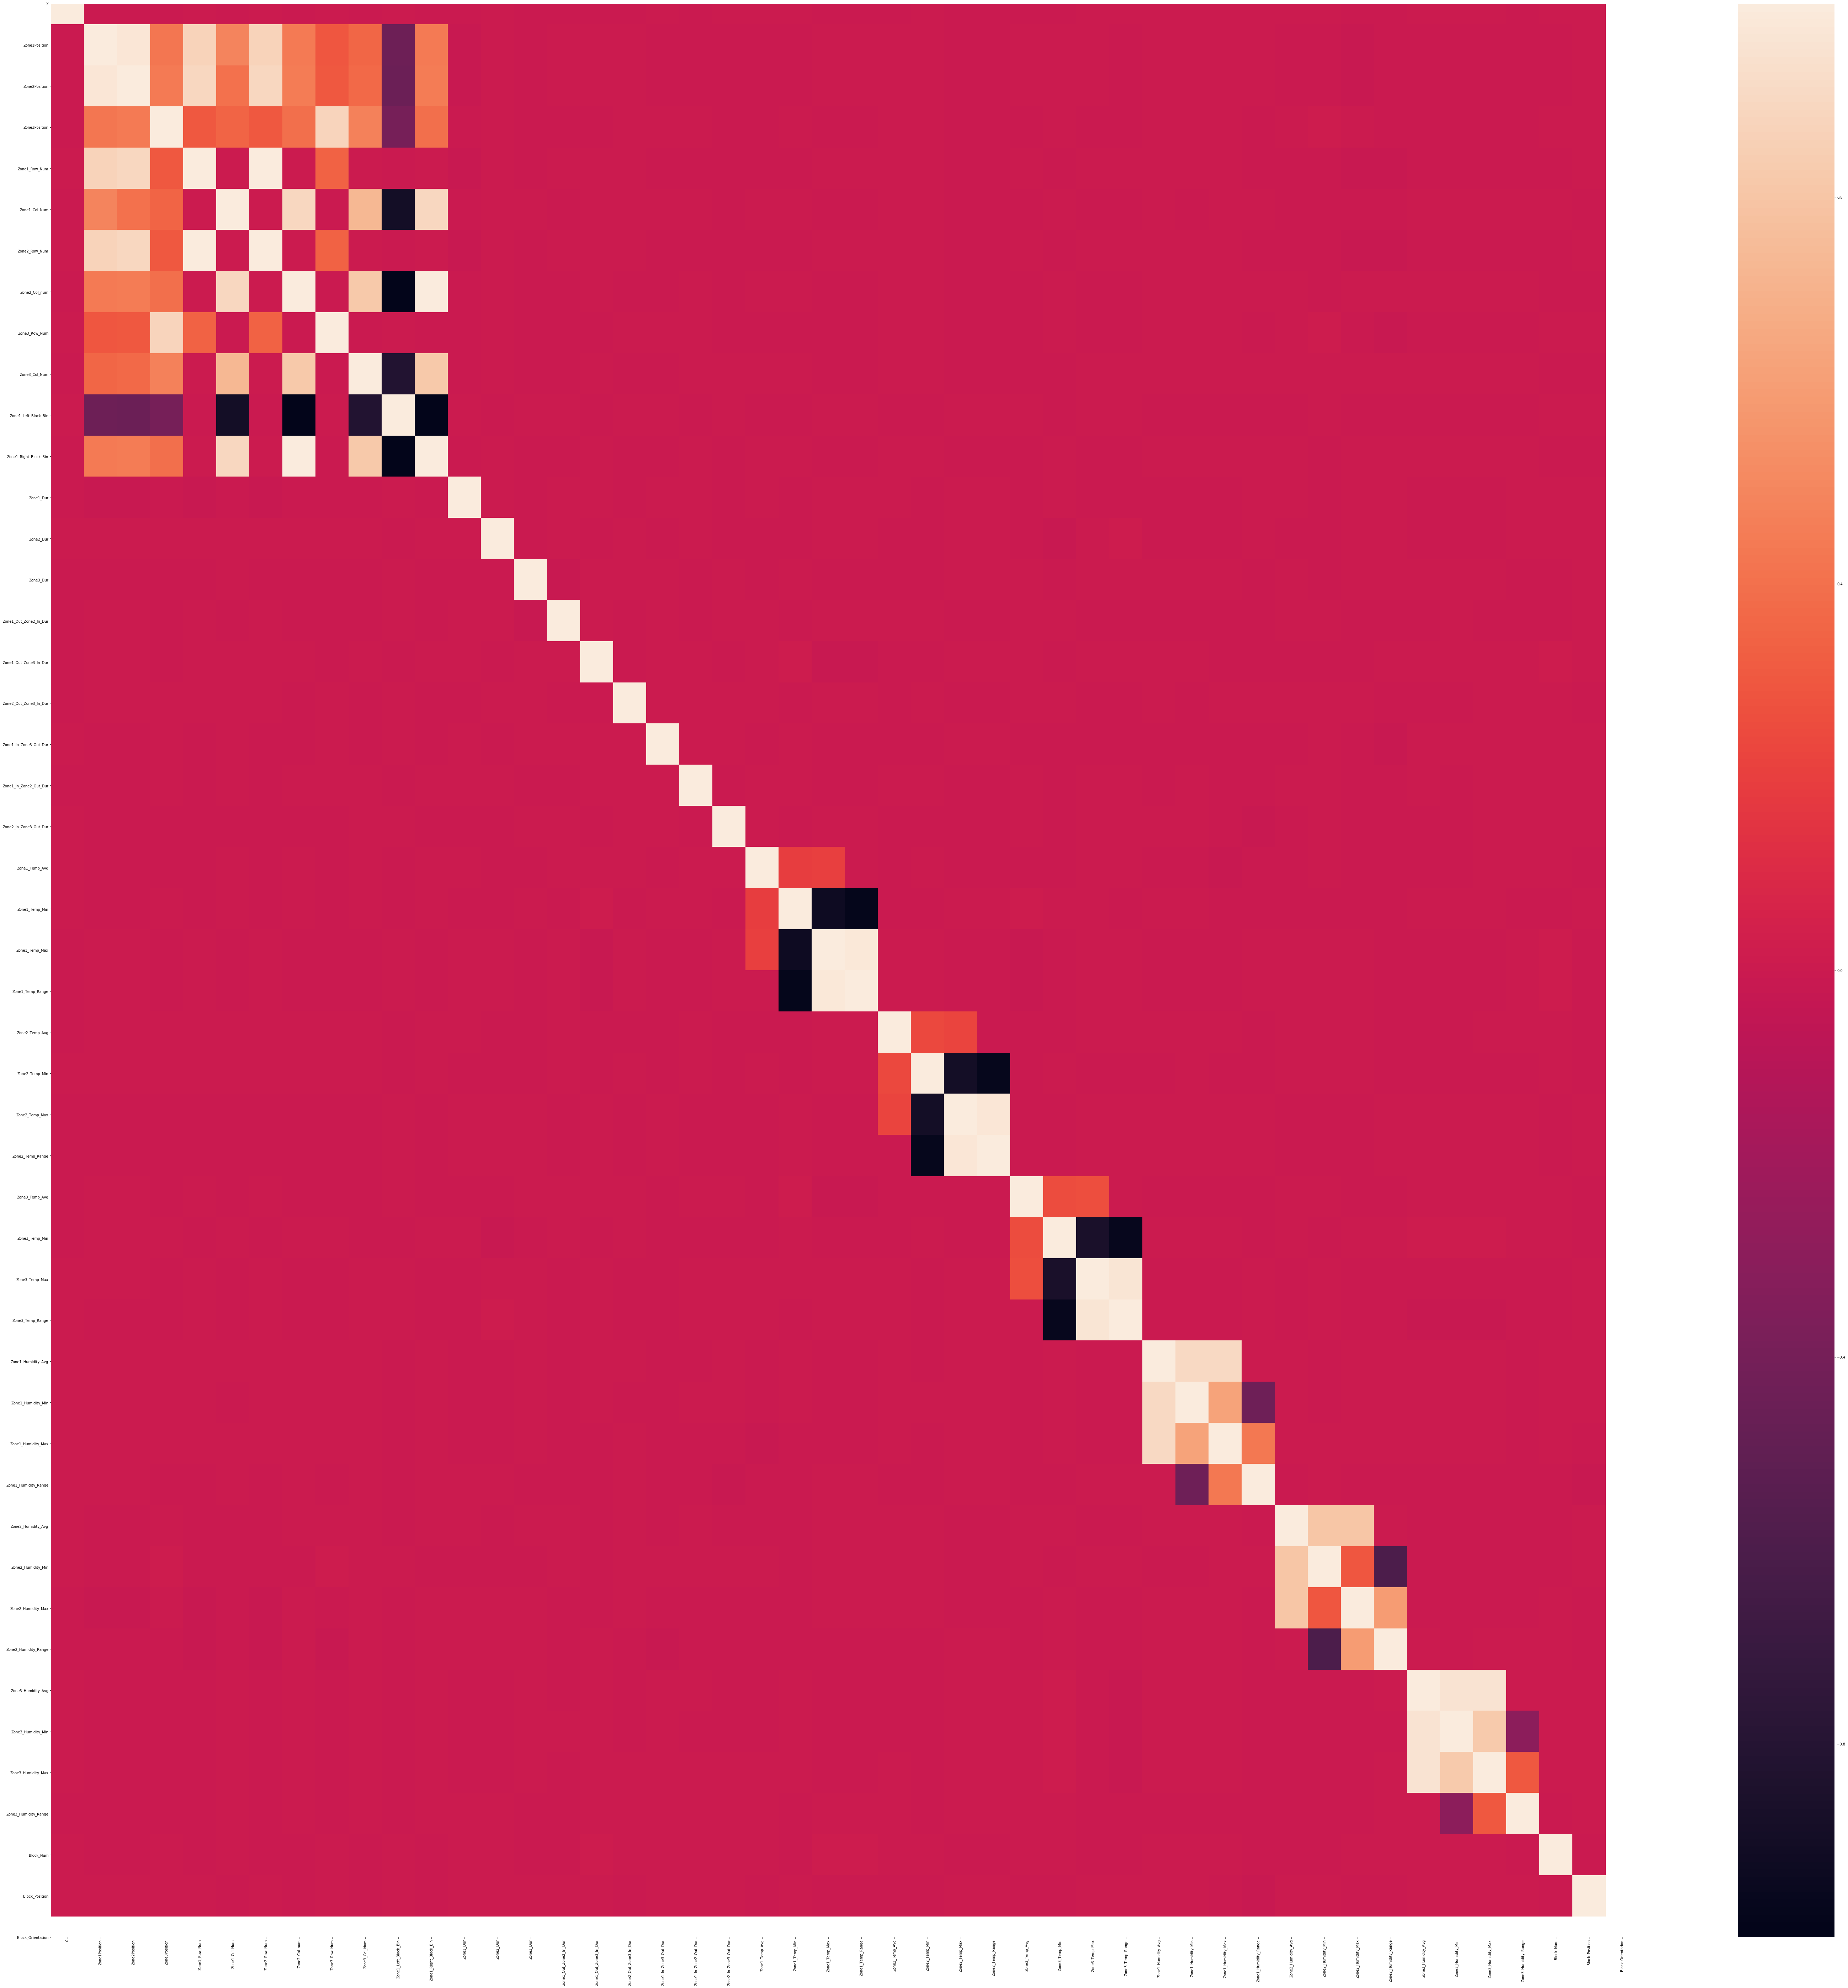

In [51]:
fig, ax = plt.subplots(figsize=(100,100)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)